In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

nights = pd.read_csv('/Users/jinny/Documents/touristcast/datasets/nights_2010-2017.csv', index_col='date', parse_dates=['date'], 
                          usecols=[*range(1, 15)])

### Monthly hotel nights per year per region (in thousands)
- Data from 2010 to 2017
- Darker colour = later data (darkest color = 2017)
- **Important** y-axis scale differs greatly depending on the region; plots below to show overall seasons in raw data

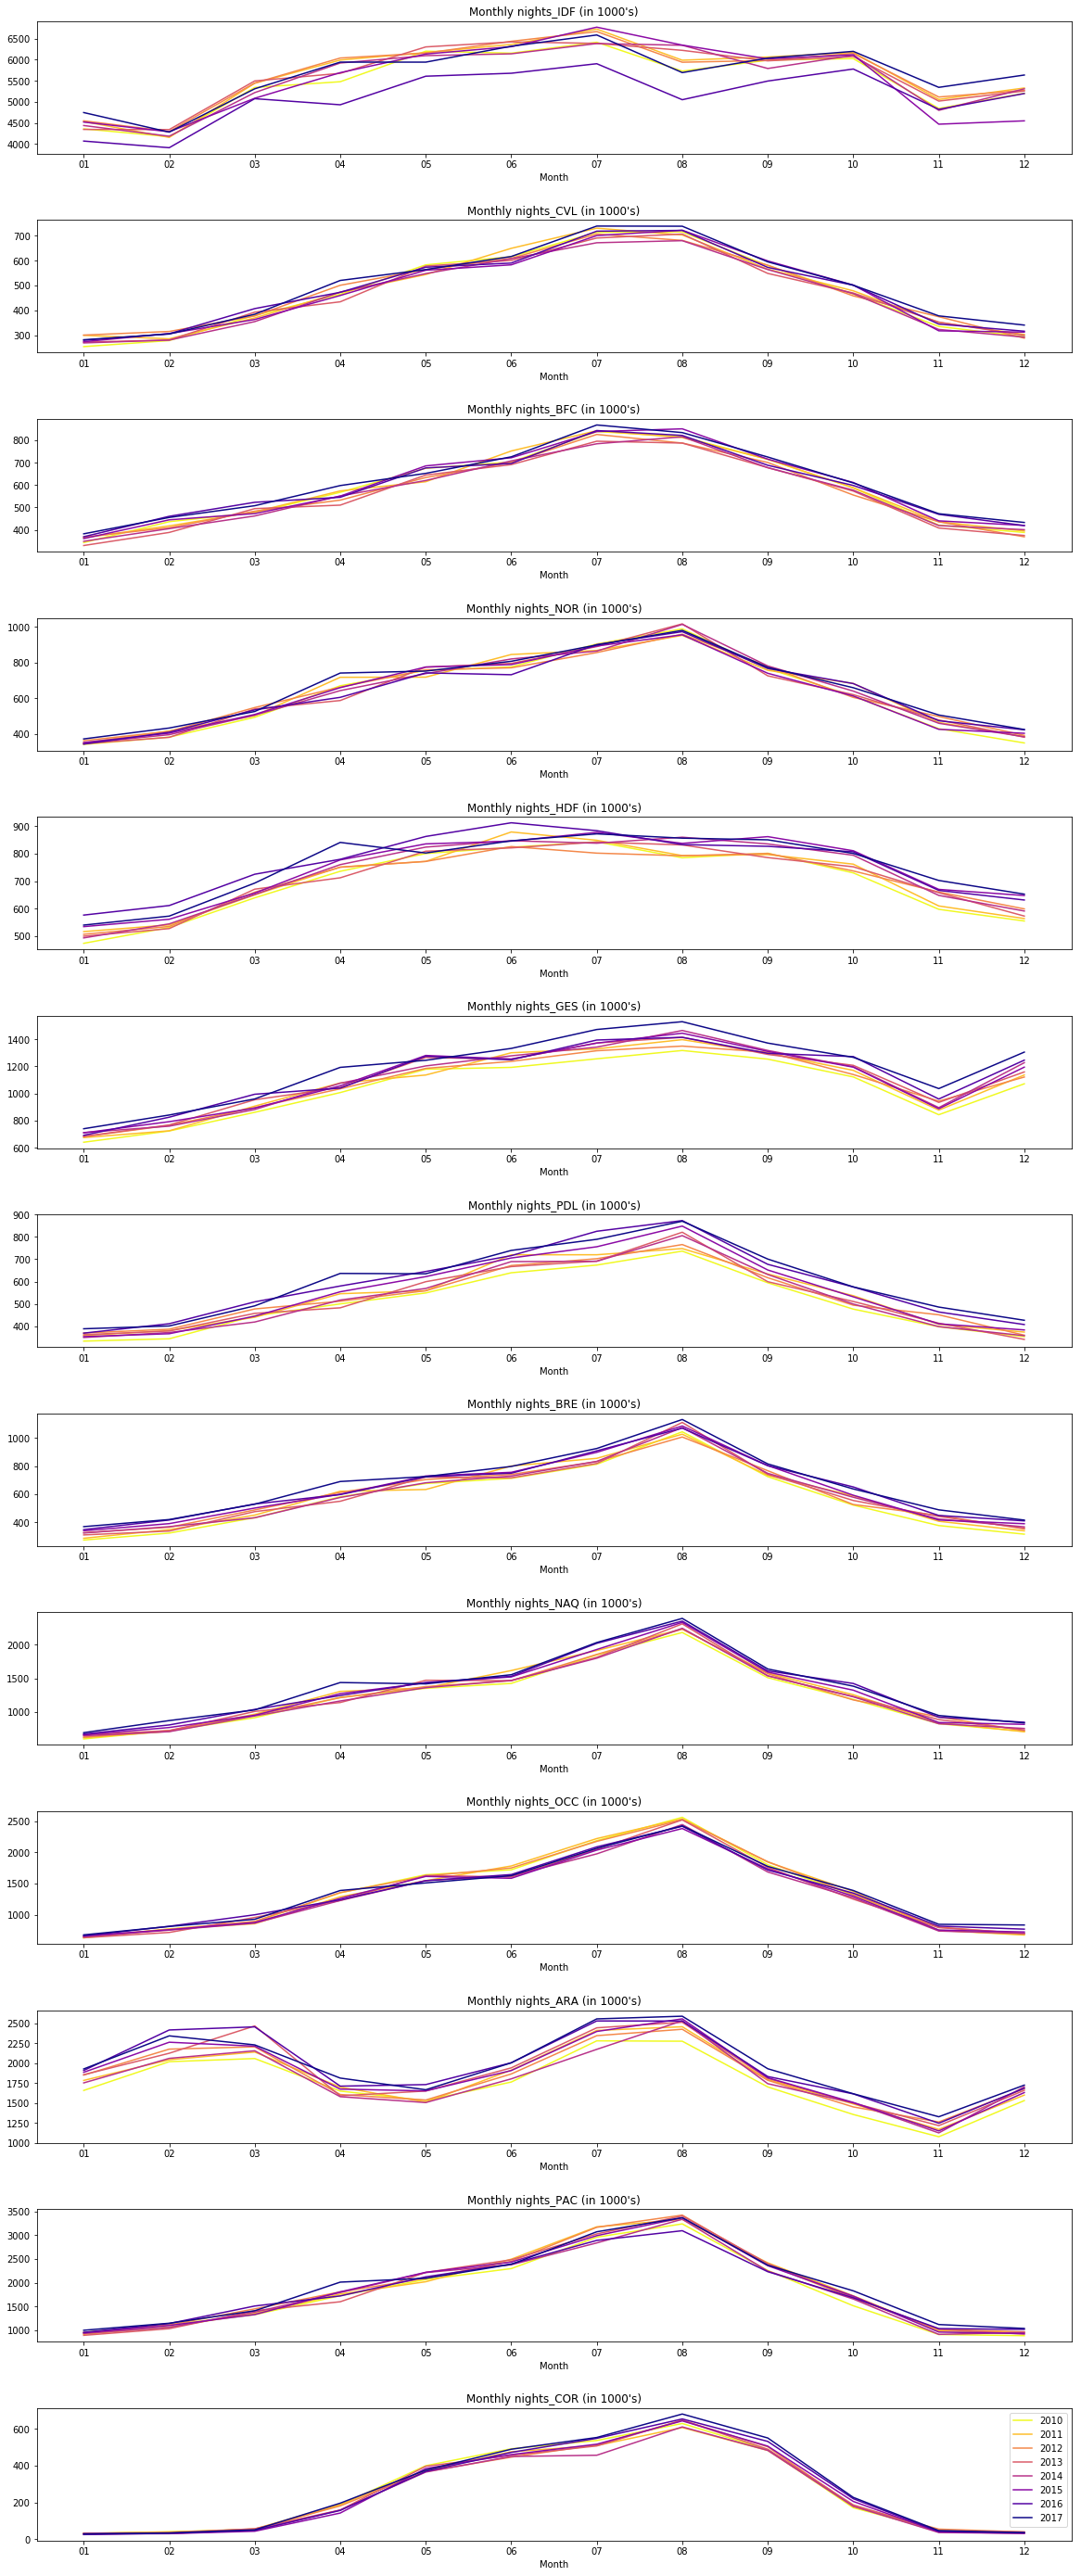

In [2]:
from matplotlib import cm

dates = [dt.datetime(2016,1,1) + dt.timedelta(days=i*31) for i in range(12)]
colors = cm.plasma_r(np.linspace(0, 1, len(range(2010, 2018))))

fig, axes = plt.subplots(len(nights.columns), 1, figsize=(20,50))

for i, region in enumerate(nights.columns):
    for j, year in enumerate(range(2010, 2018)):
        axes[i].plot(dates, nights[region][(nights.index>=str(year))&(nights.index<str(year+1))], 
                     label=year, color=colors[j])
    axes[i].set_xticks(dates)
    axes[i].set_xlabel('Month')
    axes[i].set_xticklabels([d.strftime('%m') for d in dates])
    axes[i].set_title(f"Monthly {region} (in 1000's)")
plt.legend()
plt.subplots_adjust(hspace=0.5);

### Monthly hotel nights in 2017 per region (in thousands)

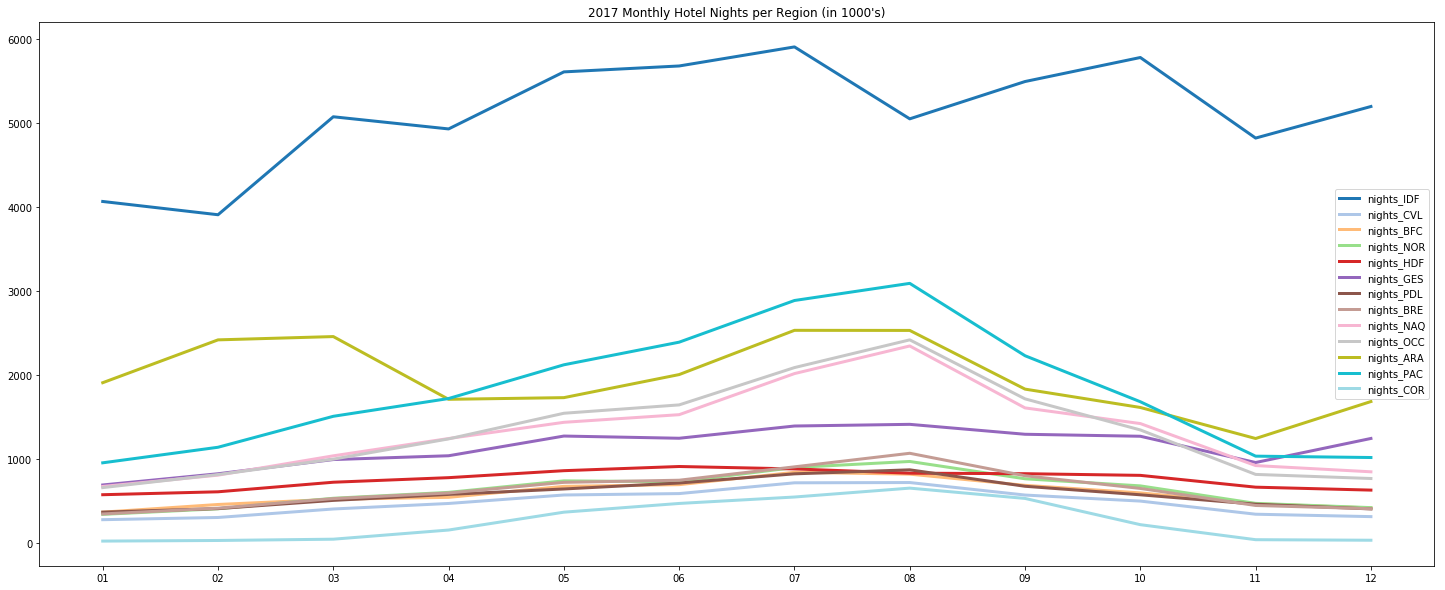

In [3]:
fig, axes = plt.subplots(1, 1, figsize=(25,10))

colors = cm.tab20(np.linspace(0, 1, 13))

for i, region in enumerate(nights.columns):
    axes.plot(dates, nights[region][(nights.index>='2016-01-01')&(nights.index<'2017-01-01')], label=region, linewidth=3, color=colors[i])
axes.set_xticks(dates)
axes.set_xticklabels([d.strftime('%m') for d in dates])
axes.set_title(f"2017 Monthly Hotel Nights per Region (in 1000's)")
axes.legend(loc='best');